In [1]:
! pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.7/120.7 KB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 42.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 66.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 59.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 54.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
    

In [2]:
! pip install --upgrade pandas==1.4.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
import nltk


##Downloading nltk packages
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [17]:
import pandas as pd
import pandas as pd
from bertopic import BERTopic
import os
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
path = os.getcwd()+'/Data/data.pkl'
with open(path, 'rb') as f:
        df = pd.read_pickle(f)
df.head()

/content/Data/data.pkl


,Category,Resume,cleaned_resume,cleaned_sent
0,Data Science,Skills * Programming Languages: Python (pandas...,"[skills programming, programming languages, la...",skills programming languages python pandas num...
1,Data Science,Education Details May 2013 to May 2017 B.E ...,"[education details, details b.e, b.e uitrgpv, ...",education details b.e uitrgpv data scientist d...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...","[areas interest, interest deep, deep learning,...",areas interest deep learning control system de...
3,Data Science,Skills R Python SAP HANA Tableau SAP...,[],
4,Data Science,"Education Details MCA YMCAUST, Faridabad...","[education details, details mca, mca ymcaust, ...",education details mca ymcaust faridabad haryan...


In [15]:
##Getting rid of empty rows
df = df[df['cleaned_sent']!= '']

In [18]:
stop_words = list(stop_words)

In [19]:
##Create seed list
d = df['cleaned_sent'].to_list()



seed_topic_list = [['c++','python','pandas','mssql server','sql','html','java','css','.net','numpy','pandas','scikit-learn','etl',
                    'hadoop','hive','bootstrap','jquery','php','html','talend'],
                   ['pune','maharashtra','alahabad','india','us'],
                   stop_words+['size','labs'],
                   ['months','year','day','january','dec','june','monday'],
                   ['salary','exprience','experience']]
                   

In [21]:
##Define BERTopic model with seed_list and tf-idf to get rid of frequent words
from bertopic.vectorizers import ClassTfidfTransformer

ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)
topic_model = BERTopic(ctfidf_model=ctfidf_model,seed_topic_list=seed_topic_list, n_gram_range=(1,4), top_n_words=30,nr_topics=5)



In [22]:
##Fitting the model
topics, probs = topic_model.fit_transform(d)

In [33]:
# topic_term_matrix = topic_model.c_tf_idf_
# words = topic_model.vectorizer_model.get_feature_names_out()

In [23]:
# words[0:100]

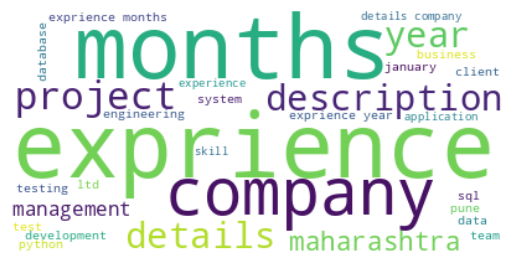

In [24]:
##visualizing as wordcloud per topic
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_wordcloud(model, topic):
    text = {word: value for word, value in model.get_topic(topic)}
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# Show wordcloud
create_wordcloud(topic_model, topic=0)


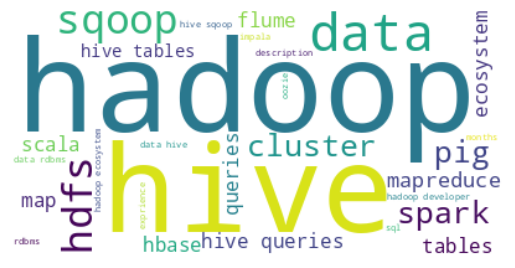

In [25]:
##visualizing as wordcloud per topic
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_wordcloud(model, topic):
    text = {word: value for word, value in model.get_topic(topic)}
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# Show wordcloud
create_wordcloud(topic_model, topic=1)

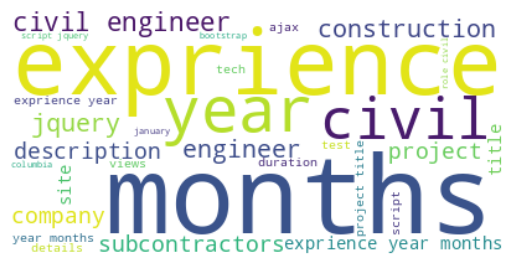

In [26]:
##visualizing as wordcloud per topic
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_wordcloud(model, topic):
    text = {word: value for word, value in model.get_topic(topic)}
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# Show wordcloud
create_wordcloud(topic_model, topic=-1)

In [27]:
##Gives count of terms per topic
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,34,-1_months_exprience_year_civil
1,0,689,0_exprience_months_company_project
2,1,42,1_hadoop_hive_data_sqoop
3,2,26,2_january_pcb_maharashtra_engineer
4,3,16,3_bootstrap_php_jquery_size


In [68]:
# Get all terms in each topic
topic_terms = topic_model.get_topics()
topic_terms

{-1: [('months', 0.38291260202226035),
  ('exprience', 0.3699590468669968),
  ('year', 0.3221025946194051),
  ('civil', 0.31806134149326615),
  ('civil engineer', 0.31686065240438543),
  ('jquery', 0.2966493777304142),
  ('engineer', 0.2965052078150043),
  ('construction', 0.29439917716580377),
  ('description', 0.28538492003853283),
  ('project', 0.2802611800121245),
  ('subcontractors', 0.27446048787025423),
  ('company', 0.2739102868540248),
  ('exprience year months', 0.2729397282360752),
  ('title', 0.27291486117931435),
  ('site', 0.2717905472456252),
  ('year months', 0.27081990639214204),
  ('exprience year', 0.27028434322161843),
  ('details', 0.26611544907631635),
  ('test', 0.2606214201099785),
  ('duration', 0.25729024016470414),
  ('project title', 0.25708361933956614),
  ('ajax', 0.25542307919639845),
  ('tech', 0.2539911715025687),
  ('views', 0.25123455721510973),
  ('script', 0.25037684405079647),
  ('script jquery', 0.24980856075947902),
  ('bootstrap', 0.246038252451

In [29]:
##Cluster distance between each topic
topic_model.visualize_topics()

In [ ]:
# similar_topics, similarity = topic_model.find_topics(cleanskill, top_n=100)



# print(similar_topics, similarity) 

# topic_model.get_topic(similar_topics[0])

In [52]:
# topics = ['c++','python','pandas','mssql server','sql','html','java','css','.net','numpy','pandas','scikit-learn','etl',
#                     'hadoop','hive','bootstrap','jquery','php','html','talend']

##Get terms that are most similar to a particular skill Eg:sql
similar_topics, similarity = topic_model.find_topics('sql')
similar_topics, similarity

([1, 0, 2, 3, -1],
 [0.5708381030778946,
  0.5116512636571128,
  0.4220093729702894,
  0.41051139441880685,
  0.40526998395519975])

In [36]:
##Shows terms that in topic -1 which represents non-skills

topic_model.get_topic(similar_topics[-1])

[('months', 0.38291260202226035),
 ('exprience', 0.3699590468669968),
 ('year', 0.3221025946194051),
 ('civil', 0.31806134149326615),
 ('civil engineer', 0.31686065240438543),
 ('jquery', 0.2966493777304142),
 ('engineer', 0.2965052078150043),
 ('construction', 0.29439917716580377),
 ('description', 0.28538492003853283),
 ('project', 0.2802611800121245),
 ('subcontractors', 0.27446048787025423),
 ('company', 0.2739102868540248),
 ('exprience year months', 0.2729397282360752),
 ('title', 0.27291486117931435),
 ('site', 0.2717905472456252),
 ('year months', 0.27081990639214204),
 ('exprience year', 0.27028434322161843),
 ('details', 0.26611544907631635),
 ('test', 0.2606214201099785),
 ('duration', 0.25729024016470414),
 ('project title', 0.25708361933956614),
 ('ajax', 0.25542307919639845),
 ('tech', 0.2539911715025687),
 ('views', 0.25123455721510973),
 ('script', 0.25037684405079647),
 ('script jquery', 0.24980856075947902),
 ('bootstrap', 0.24603825245187638),
 ('january', 0.24506557

In [54]:
####Shows terms that in topic -1 which represents skills
topic_model.get_topic(similar_topics[0])

[('hadoop', 0.6731257621416745),
 ('hive', 0.6054045808510291),
 ('data', 0.5199408447904171),
 ('sqoop', 0.40770809903555033),
 ('hdfs', 0.4022631460691531),
 ('cluster', 0.34956332330211976),
 ('spark', 0.3489209944146124),
 ('pig', 0.33752973173936196),
 ('mapreduce', 0.3296398275735847),
 ('hbase', 0.3014659567384807),
 ('scala', 0.28365850052565894),
 ('hive queries', 0.28365850052565894),
 ('tables', 0.274560307499182),
 ('map', 0.2742700472538615),
 ('ecosystem', 0.2726790828341012),
 ('queries', 0.271661430285152),
 ('flume', 0.260854496175348),
 ('hive tables', 0.260854496175348),
 ('hadoop developer', 0.260854496175348),
 ('exprience', 0.2578205025580889),
 ('hadoop ecosystem', 0.24800541575724444),
 ('data hive', 0.24800541575724444),
 ('oozie', 0.24800541575724444),
 ('hive sqoop', 0.24800541575724444),
 ('sql', 0.24737369398332879),
 ('months', 0.24660499523483811),
 ('description', 0.2462726828819139),
 ('rdbms', 0.2393914438743191),
 ('impala', 0.2338819432938117),
 ('da

In [39]:
## First and last element are least similar to the search term:
##Those are not skills.
least_sim_min = similar_topics[0]
least_sim_max = similar_topics[-1]

print(topic_model.get_topic(similar_topics[least_sim_min ]))

print(topic_model.get_topic(similar_topics[least_sim_max]))

[('exprience', 0.29626003789842414), ('months', 0.28878119964499455), ('company', 0.24758726526722832), ('project', 0.24063630185216417), ('description', 0.2349368846066565), ('details', 0.23039699998618188), ('year', 0.22294498007591504), ('maharashtra', 0.21803099007228213), ('management', 0.21547422021378645), ('exprience months', 0.212025160412115), ('january', 0.21153559034563552), ('team', 0.20134390271540378), ('sql', 0.1984650206668234), ('pune', 0.1973050729875671), ('testing', 0.19623600789966625), ('system', 0.19477897632360258), ('test', 0.18765263614147631), ('development', 0.1857456431697976), ('client', 0.1841613718951598), ('database', 0.1830056991154547), ('data', 0.18252154018817715), ('python', 0.18160225295085408), ('business', 0.17857291391579516), ('ltd', 0.1782253170348846), ('exprience year', 0.17793194207771357), ('engineering', 0.17508332005063246), ('details company', 0.1738341333658839), ('application', 0.1732156181159729), ('skill', 0.17006831970497557), ('

In [40]:
##Getting skills from the relevant topics and discarding the above topic ids
sim_skills = similar_topics[1:-1]

sim_skills 

[0, 2, 3]

In [41]:
##Getting skills based on probability>0.01 after analyzing topics 
skills = []

for i in sim_skills:
  temp = topic_model.get_topic(similar_topics[i])
  for i in temp:
    if round(i[1],3)>0.01:
      skills.append(i[0])

In [42]:
skills

['hadoop',
 'hive',
 'data',
 'sqoop',
 'hdfs',
 'cluster',
 'spark',
 'pig',
 'mapreduce',
 'hbase',
 'scala',
 'hive queries',
 'tables',
 'map',
 'ecosystem',
 'queries',
 'flume',
 'hive tables',
 'hadoop developer',
 'exprience',
 'hadoop ecosystem',
 'data hive',
 'oozie',
 'hive sqoop',
 'sql',
 'months',
 'description',
 'rdbms',
 'impala',
 'data rdbms',
 'january',
 'pcb',
 'maharashtra',
 'engineer',
 'months pcb',
 'exprience months pcb',
 'quality engineer',
 'pcb design',
 'matrix technologies',
 'design engineer',
 'machine',
 'details',
 'design',
 'university january',
 'university january ssc',
 'matrix',
 'engineering',
 'civil',
 'january ssc',
 'board',
 'mechanical',
 'project',
 'details january',
 'civil engineering',
 'ssc',
 'diploma',
 'exprience',
 'details diploma project speed',
 'system solar',
 'knowledge mspower',
 'bootstrap',
 'php',
 'jquery',
 'size',
 'bootstrap php',
 'css',
 'size position',
 'html css bootstrap php',
 'position software develope

In [43]:
##GetDocument wise topic distribution with probability

doc_topics = pd.DataFrame()
doc_topics = topic_model.get_document_info(d)

In [44]:
doc_topics.head()

,Document,Topic,Name,Top_n_words,Probability,Representative_document
0,skills programming languages python pandas num...,0,0_exprience_months_company_project,exprience - months - company - project - descr...,1.000000,False
1,education details b.e uitrgpv data scientist d...,0,0_exprience_months_company_project,exprience - months - company - project - descr...,0.182545,False
2,areas interest deep learning control system de...,0,0_exprience_months_company_project,exprience - months - company - project - descr...,1.000000,False
3,education details mca ymcaust faridabad haryan...,0,0_exprience_months_company_project,exprience - months - company - project - descr...,0.645251,False
4,skills c basics iot python matlab data science...,0,0_exprience_months_company_project,exprience - months - company - project - descr...,0.255180,False


In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sentence_transformers import SentenceTransformer
from bertopic import BERTopic
from umap import UMAP

# Prepare embeddings
sentence_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = sentence_model.encode(d, show_progress_bar=False)

# Train BERTopic
topic_model = BERTopic(seed_topic_list=seed_topic_list,top_n_words=20, n_gram_range=(1,4),nr_topics=5).fit(d, embeddings)

# Run the visualization with the original embeddings
topic_model.visualize_documents(d, embeddings=embeddings)

# Reduce dimensionality of embeddings, this step is optional but much faster to perform iteratively:
reduced_embeddings = UMAP(n_neighbors=10, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)
topic_model.visualize_documents(d, reduced_embeddings=reduced_embeddings)


In [69]:
topic_model.visualize_barchart()

In [70]:
topic_model.visualize_heatmap()

In [71]:
###Number of terms representing topics declines after 30
topic_model.visualize_term_rank()

In [79]:

##Writing skills extracted from topics to dataframe
df_skills = pd.DataFrame(skills, columns=['skill'])

##writing skills to csv
df_skills.to_csv(os.getcwd()+'/Data/guided_skills.csv')

In [75]:
##Save model for reuse
topic_model.save("guidedBert")



In [81]:
! rm -rf /content/src
#testing on info dataset

In [ ]:
topic_model = BERTopic.load("/content/guidedBert-2")

In [ ]:
with open('/content/info_data.pkl', 'rb') as f:
      df = pd.read_pickle(f)
df.head()

,resume_name,resume_content,Resume,cleaned_resume,cleaned_sent
0,/content/INFORMATION-TECHNOLOGY/12635195.pdf,objective to obtain a position in the informat...,objective to obtain a position in the informat...,"[objective position, position information, inf...",objective position information technology pers...
1,/content/INFORMATION-TECHNOLOGY/10265057.pdf,working rf systems engineer qualifications mic...,working rf systems engineer qualifications mic...,"[rf systems, systems engineer, engineer qualif...",rf systems engineer qualifications microsoft o...
2,/content/INFORMATION-TECHNOLOGY/41344156.pdf,information systems 2014 park university ...,information systems 2014 park university ...,[],
3,/content/INFORMATION-TECHNOLOGY/35325329.pdf,actively collaborating with washington state's...,actively collaborating with washington state's...,[],
4,/content/INFORMATION-TECHNOLOGY/31111279.pdf,timekeeping systems) lead a team of 60 members...,timekeeping systems) lead a team of 60 members...,"[systems team, team members, members clinical,...",systems team members clinical corporate areas ...
